# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


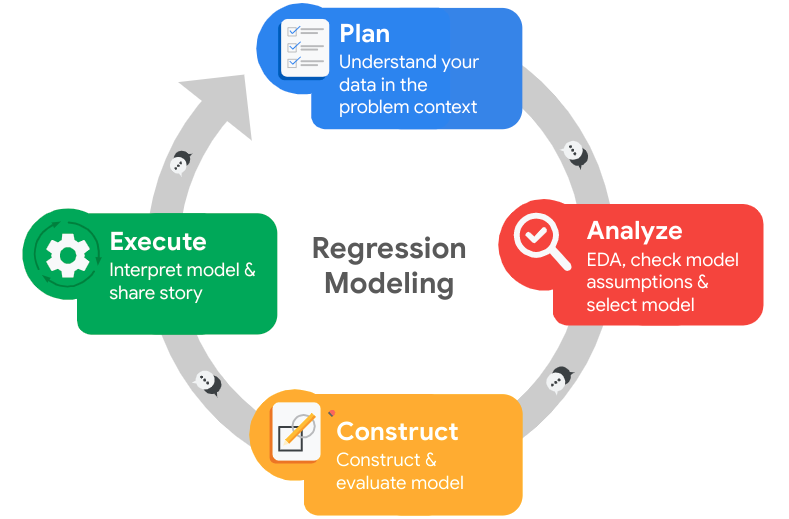

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
> Data analytics team, Human Resources department, Recruiting and training teams
- What are you trying to solve or accomplish?
> Predict which employees are likely to leave and identify the key factors driving turnover
- What are your initial observations when you explore the data?
> Employees who left tend to work more hours and spend more years at the company + satisfaction level and last evaluation vary widely and may correlate with turnover
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
> Plotting and EDA guides, XGBoost documentation
- Do you have any ethical considerations in this stage?
> Ensure predictions are used to support employees - not punish them

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

import warnings
warnings.filterwarnings('ignore')

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
df0 = pd.read_csv("HR_capstone_dataset.csv")

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No missing values

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

20% of data

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

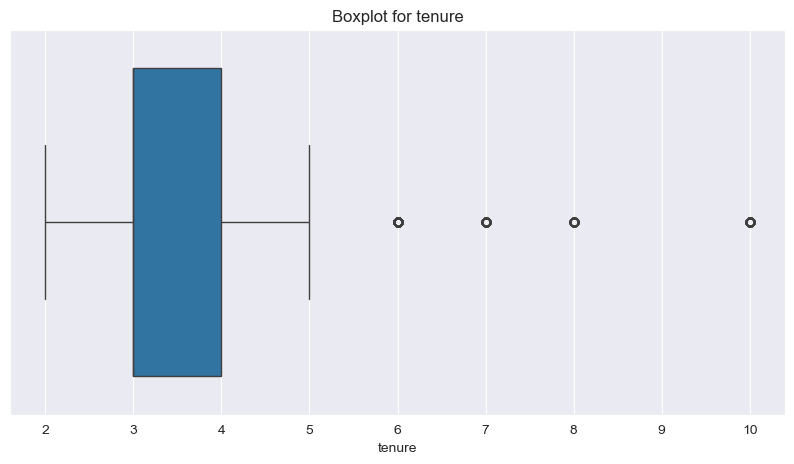

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10,5))
plt.title('Boxplot for tenure')
sns.boxplot(x=df1['tenure'])
plt.show()

There are some outliers in tenure and we can check how many

In [12]:
# Determine the number of rows containing outliers 

# 25th and 75th percentiles
per25 = df1['tenure'].quantile(0.25)
per75 = df1['tenure'].quantile(0.75)

# interquartile range 
iqr = per75 - per25

up_limit = per75 + (1.5*iqr)
low_limit = per25 - (1.5*iqr)

outliers = df1[(df1['tenure'] > up_limit) | (df1['tenure'] < low_limit)]

print("Number of rows that contain outliers in tenure:", len(outliers))

Number of rows that contain outliers in tenure: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print('\n')

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True)*100)

left
0    10000
1     1991
Name: count, dtype: int64


left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

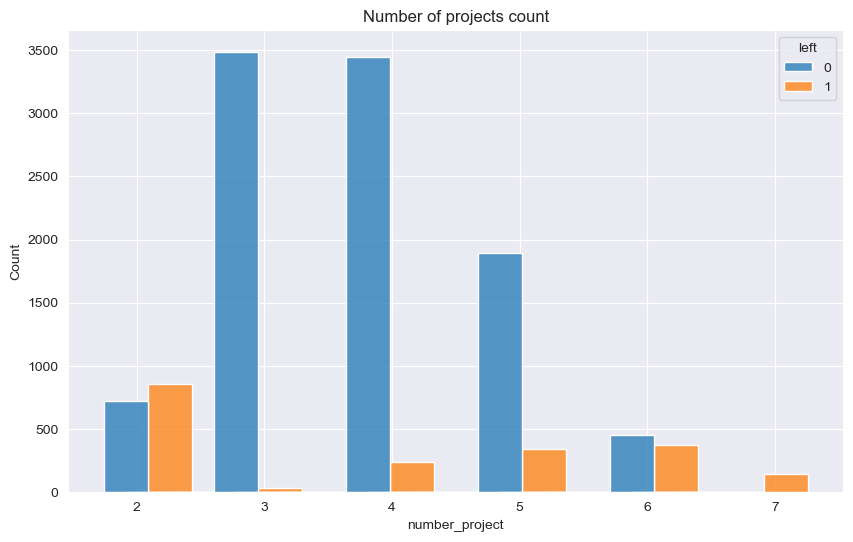

In [14]:
fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(data=df1, x='number_project', hue='left', multiple = 'dodge', shrink=4)
ax.set_title('Number of projects count')

fig.show()

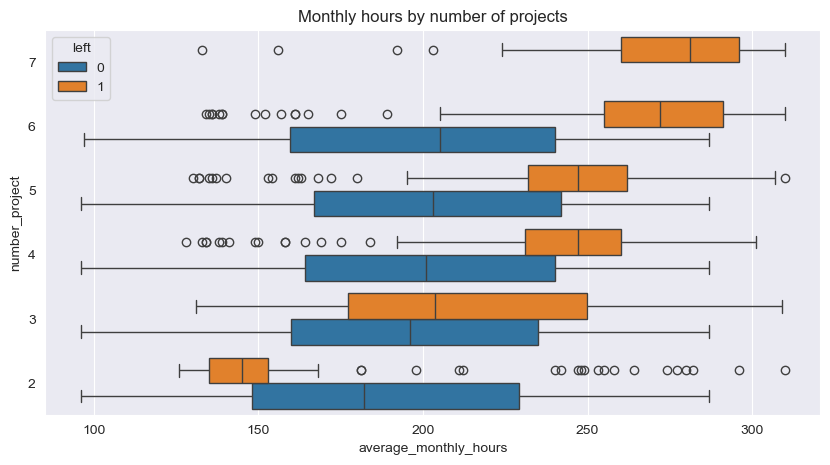

In [15]:
fig, ax = plt.subplots(figsize = (10,5))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h")
ax.invert_yaxis()
ax.set_title('Monthly hours by number of projects')
fig.show()

1. Among those who left, some worked far fewer hours
2. Employees with seven projects left [need to check]
3. Employees with the smallest amount of working hours left [or got fired]

In [16]:
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

Text(0.5, 1.0, 'Overall Satisfaction Level Distribution')

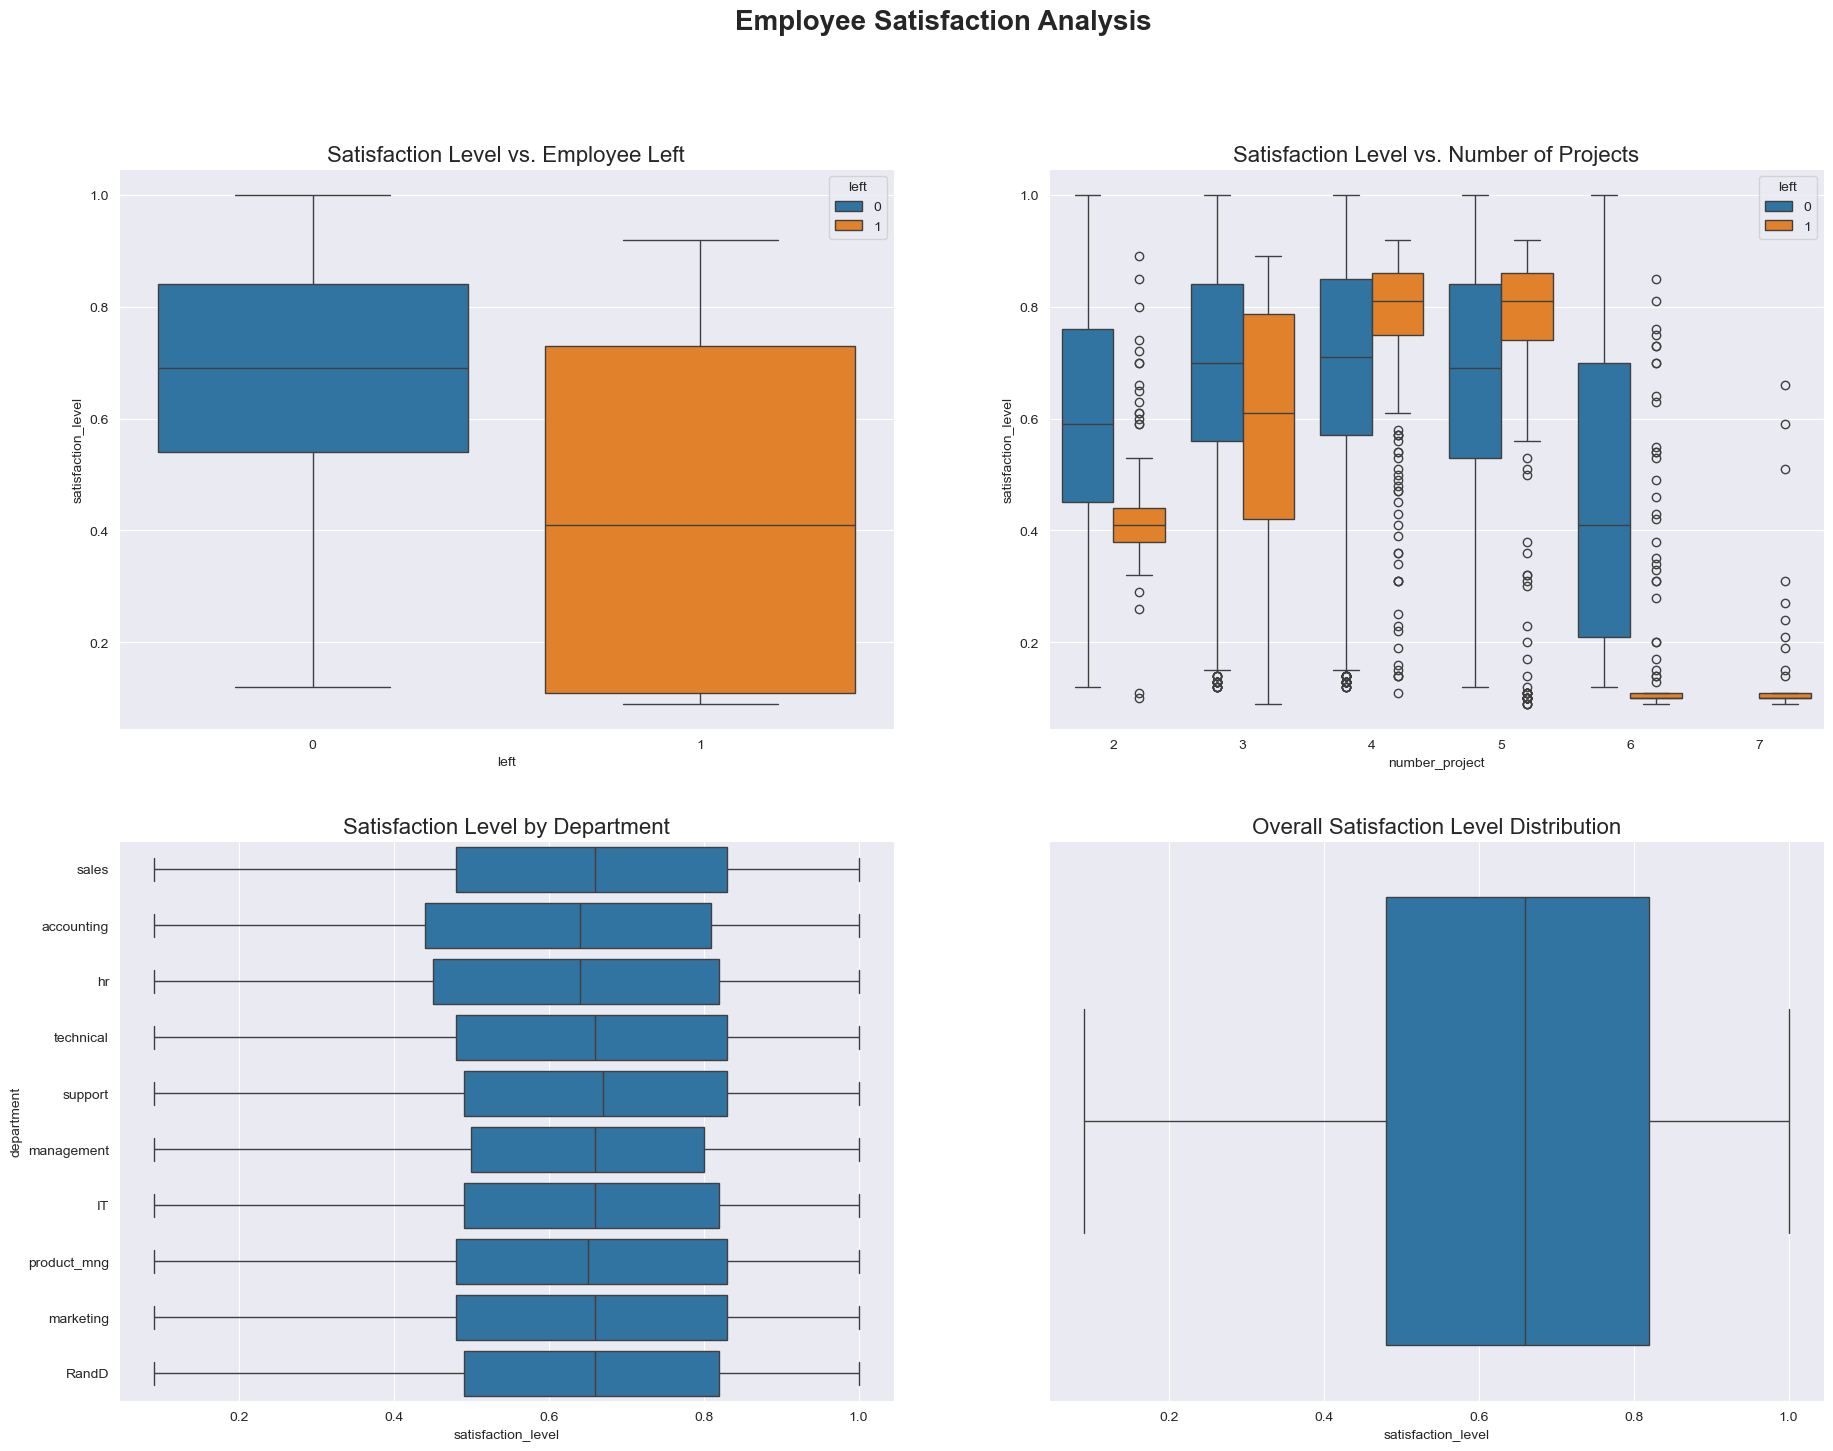

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(22, 16))
fig.suptitle('Employee Satisfaction Analysis', fontsize=20, fontweight='bold')

sns.boxplot(data=df1, x='left', y='satisfaction_level', hue='left', ax=ax[0][0])
ax[0][0].set_title('Satisfaction Level vs. Employee Left', fontsize=16)

sns.boxplot(data=df1, x='number_project', y='satisfaction_level', hue='left', ax=ax[0][1])
ax[0][1].set_title('Satisfaction Level vs. Number of Projects', fontsize=16)

sns.boxplot(data=df1, y='department', x='satisfaction_level', orient='h', ax=ax[1][0])
ax[1][0].set_title('Satisfaction Level by Department', fontsize=16)

sns.boxplot(data=df1, x='satisfaction_level', ax=ax[1][1])
ax[1][1].set_title('Overall Satisfaction Level Distribution', fontsize=16)

We can see that:
    1. People that left and had 6 or 7 also had low satisfaction level
    2. There is no big difference in satisfaction level between departments
    3. People who left company have lower satisfaction_level

Text(0, 0.5, 'Time Spent at Company (Years)')

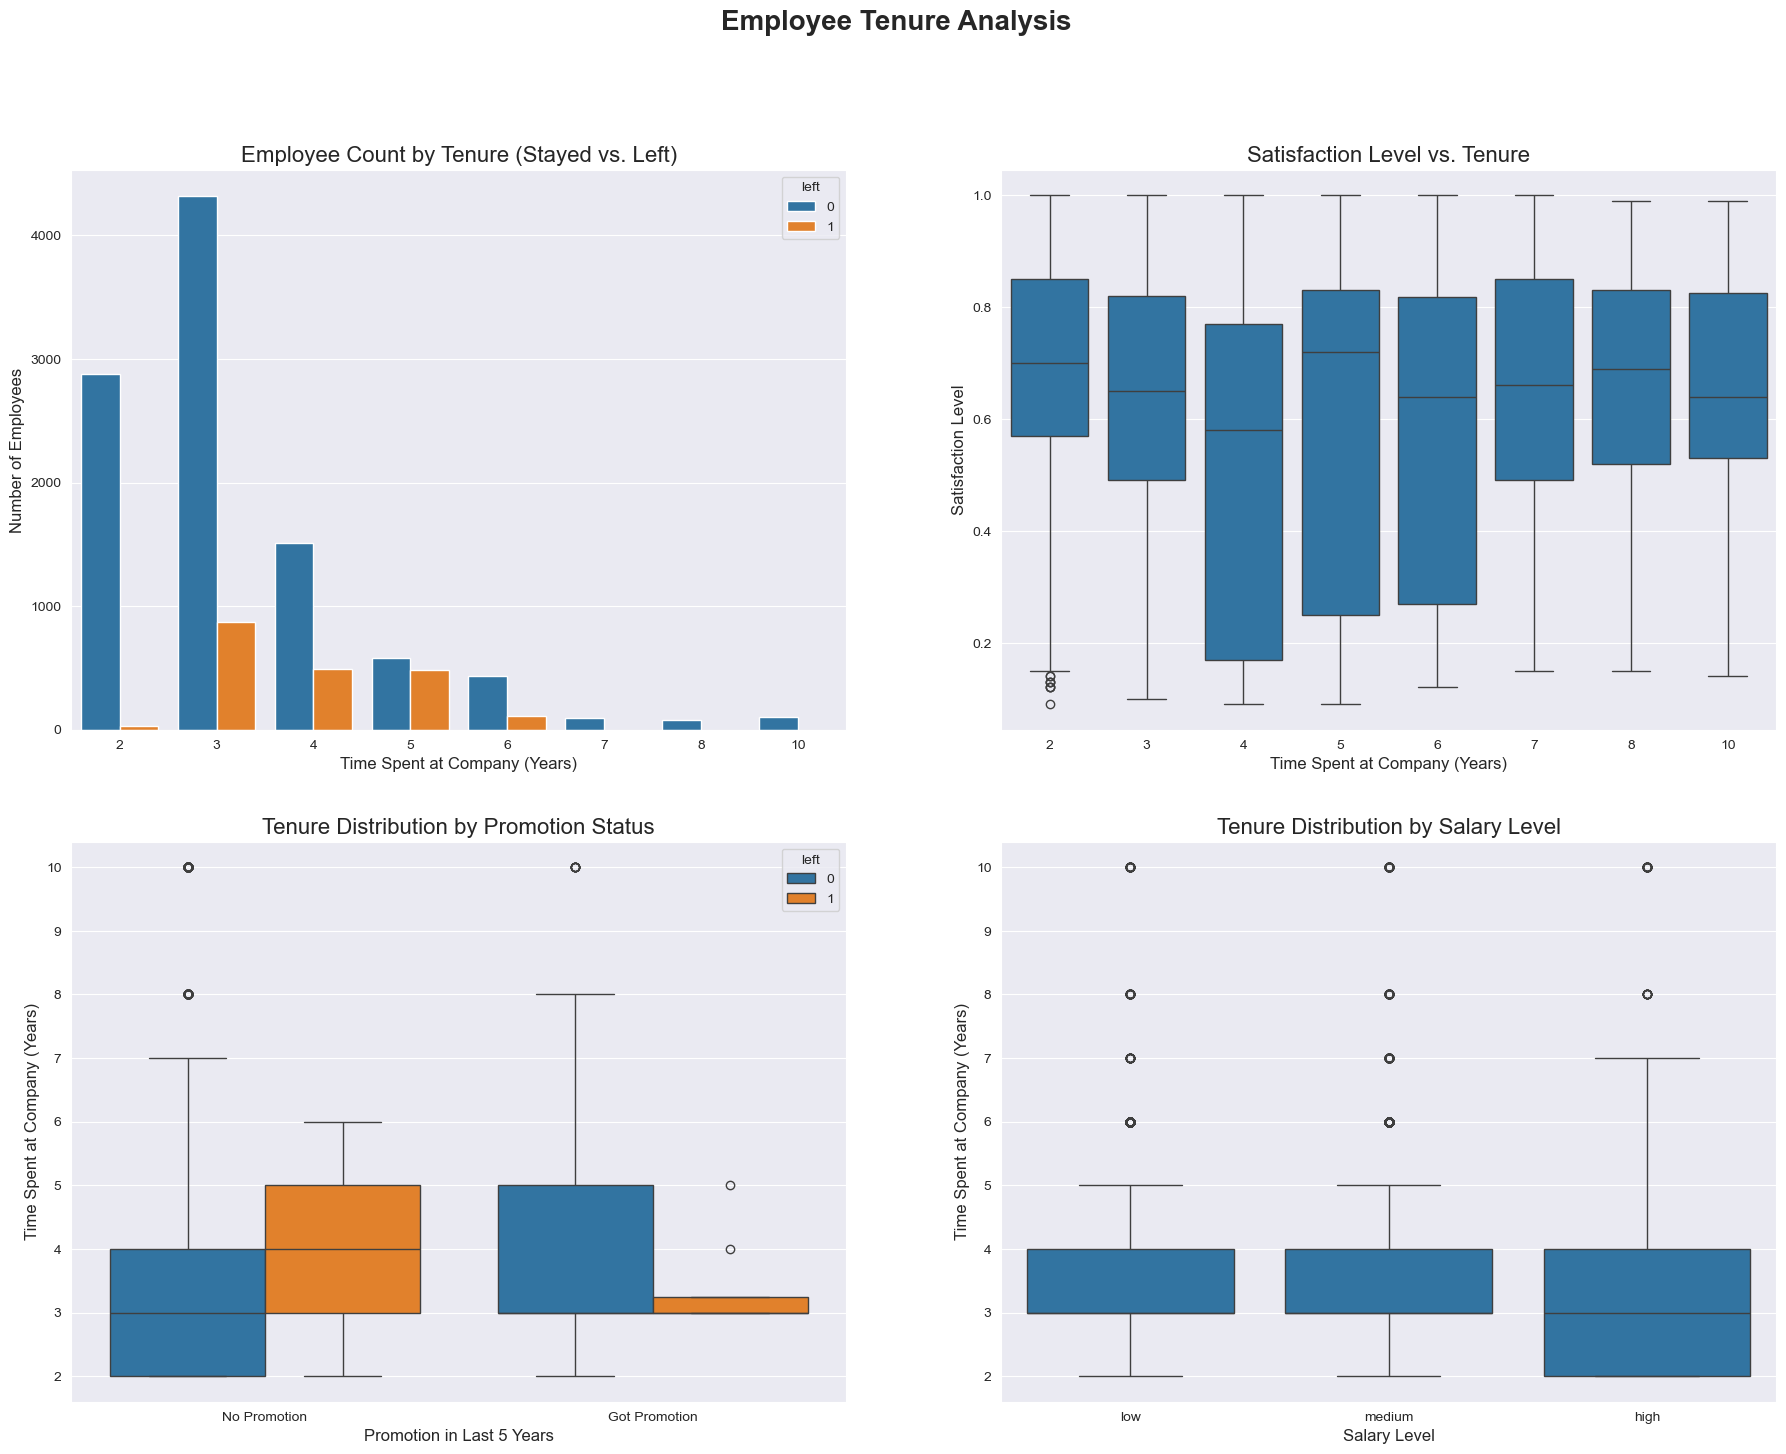

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(22, 16))

fig.suptitle('Employee Tenure Analysis', fontsize=20, fontweight='bold')

sns.countplot(data=df1, x='tenure', hue='left', ax=ax[0][0])
ax[0][0].set_title('Employee Count by Tenure (Stayed vs. Left)', fontsize=16)
ax[0][0].set_xlabel('Time Spent at Company (Years)', fontsize=12)
ax[0][0].set_ylabel('Number of Employees', fontsize=12)

sns.boxplot(data=df1, x='tenure', y='satisfaction_level', ax=ax[0][1])
ax[0][1].set_title('Satisfaction Level vs. Tenure', fontsize=16)
ax[0][1].set_xlabel('Time Spent at Company (Years)', fontsize=12)
ax[0][1].set_ylabel('Satisfaction Level', fontsize=12)

sns.boxplot(data=df1, x='promotion_last_5years', y='tenure', hue='left', ax=ax[1][0])
ax[1][0].set_title('Tenure Distribution by Promotion Status', fontsize=16)
ax[1][0].set_xlabel('Promotion in Last 5 Years', fontsize=12)
ax[1][0].set_ylabel('Time Spent at Company (Years)', fontsize=12)
ax[1][0].set_xticklabels(['No Promotion', 'Got Promotion'])

sns.boxplot(data=df1, x='salary', y='tenure', order=['low', 'medium', 'high'], ax=ax[1][1])
ax[1][1].set_title('Tenure Distribution by Salary Level', fontsize=16)
ax[1][1].set_xlabel('Salary Level', fontsize=12)
ax[1][1].set_ylabel('Time Spent at Company (Years)', fontsize=12)

1. There is no left employees that work more than 6 years in company. Most of employees that left worked in company for 3-5 years
2. We can also see that on 4-6 years of work in company satisfaction level goes lower
3. Employees that worked more that 4 years and hadn't got promotion left

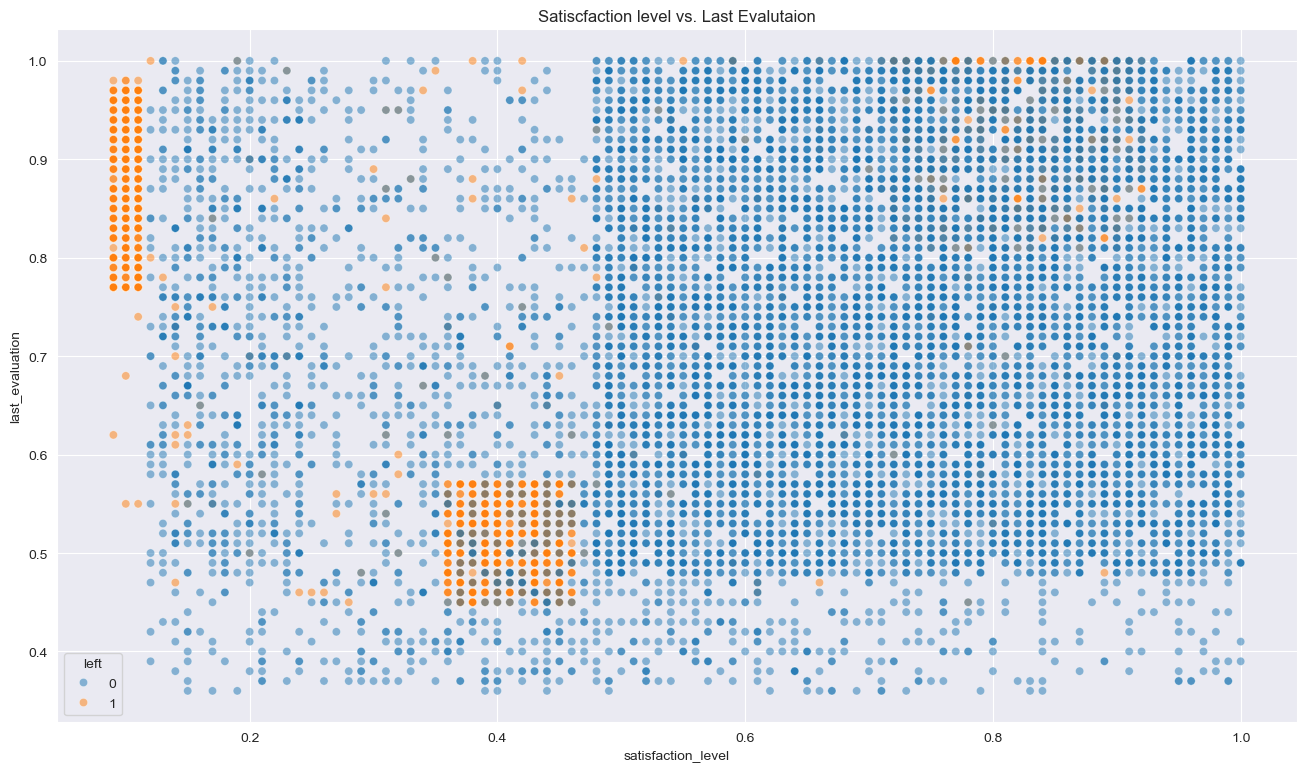

In [19]:
plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=df1,
    x='satisfaction_level',
    y='last_evaluation',
    hue='left',
    alpha=0.5
)
plt.title('Satiscfaction level vs. Last Evalutaion')
plt.show()

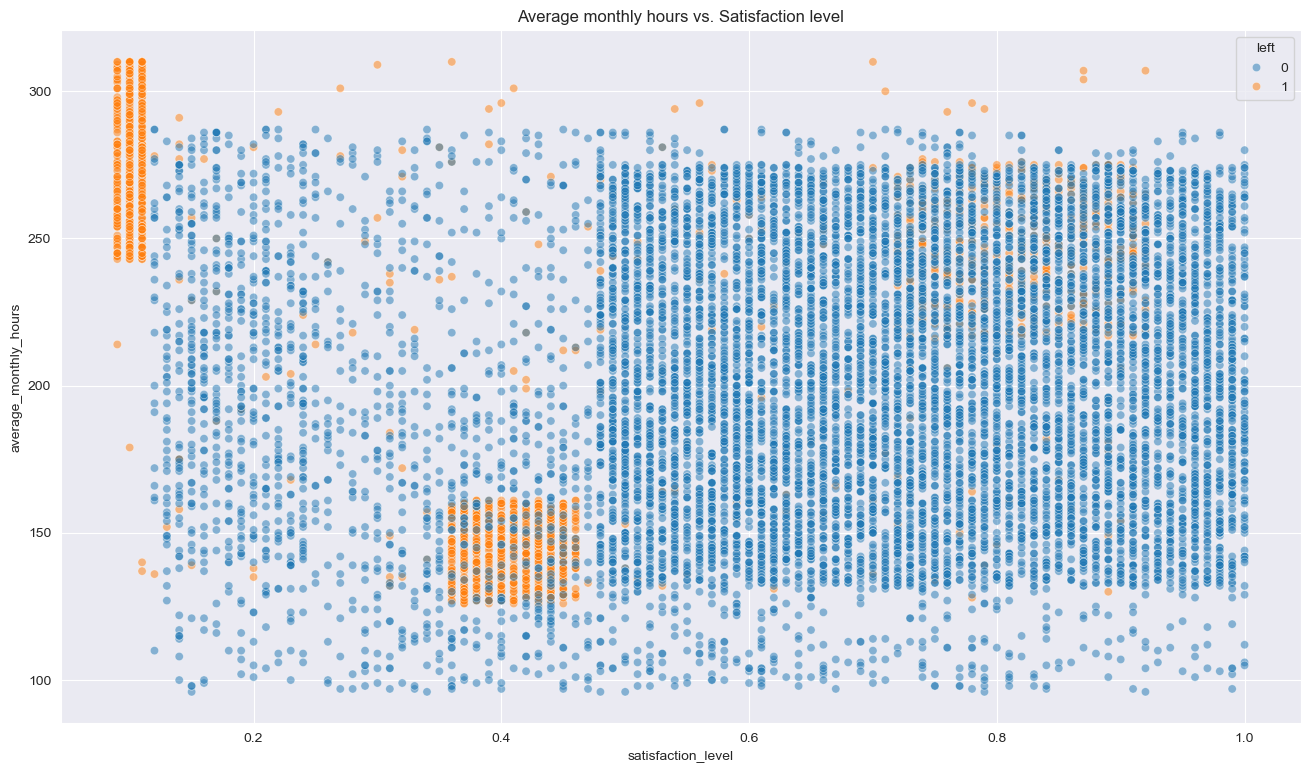

In [20]:
plt.figure(figsize=(16, 9))
sns.scatterplot(
    data=df1,
    x='satisfaction_level',
    y='average_monthly_hours',
    hue='left',
    alpha=0.5
)
plt.title('Average monthly hours vs. Satisfaction level')
plt.show()

Based on the charts, there can be main two groups of employees quitting:

- 1: Overworked [high hours] and unhappy [low satisfaction]
- 2: Top performers [high evaluation | hight satisfaction] who are working too many hours

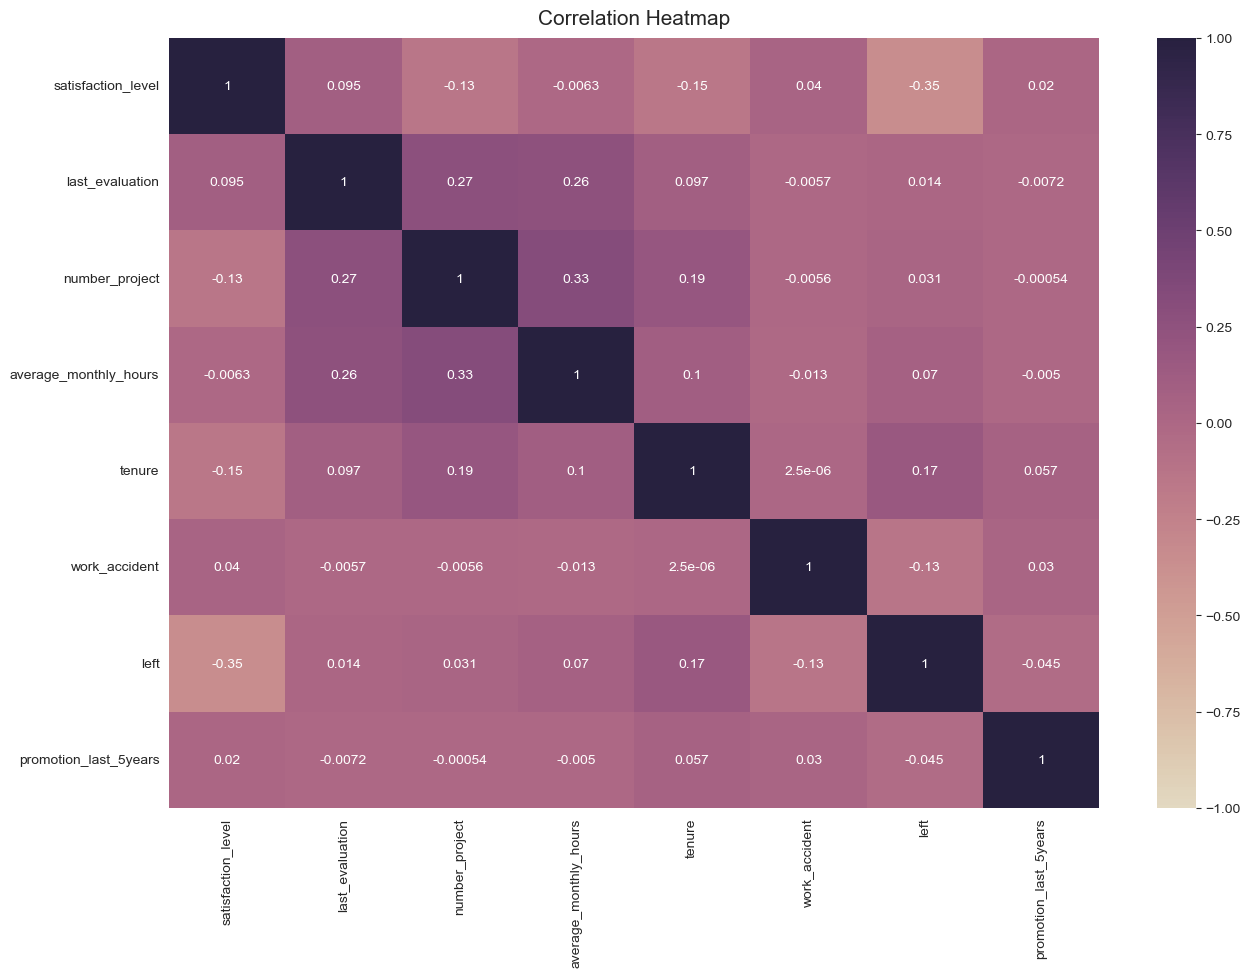

In [21]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df1.loc[:, (df1.columns!='department') & (df1.columns!='salary')].corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=10);

On correlation heatmap we can see that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level

### Insights

Employees seem to leave due to poor management: long hours, many projects, and low satisfaction. Working hard without promotions or strong evaluations is discouraging, and many employees appear burned out. However, those who stay longer than six years are less likely to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

You need to predict 'left' variable (if employee leave company or no), which is categorical variable [0 - left] [1 - stay]

### Identify the types of models most appropriate for this task.

Logistic Regresion or Tree-Based ML Models

### Modeling


In [22]:
df_analyze = df1.copy()

df_analyze['salary'] = (
    df_analyze['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_analyze = pd.get_dummies(df_analyze, drop_first=False)

df_analyze.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


# Logistic Regression

Heatmap to see how data variables are correlated

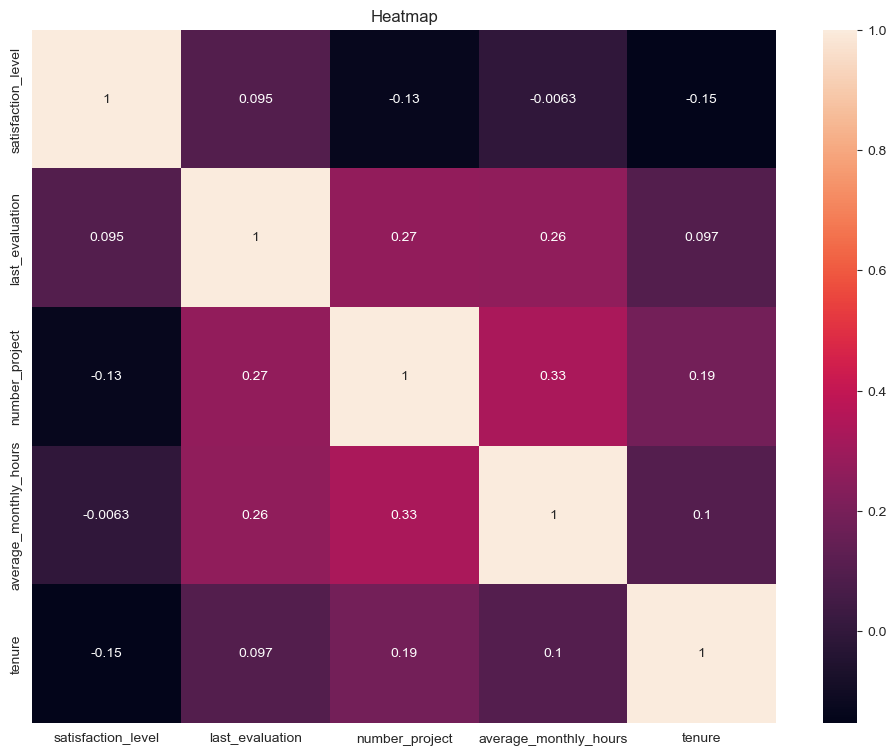

In [23]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_analyze[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), annot=True)
plt.title('Heatmap')
plt.show()

Removing of outliers in our data

In [24]:
df_for_logistical_regression = df_analyze[(df_analyze['tenure'] >= low_limit) & (df_analyze['tenure'] <= up_limit)]

df_for_logistical_regression.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [25]:
y = df_for_logistical_regression['left']

X = df_for_logistical_regression.drop('left', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    stratify=y, 
                                                    random_state=42)

logistic_regression = LogisticRegression(random_state=42, 
                                         max_iter=500).fit(X_train, y_train)

In [27]:
y_pred = logistic_regression.predict(X_test)

### Creating confussion matrix

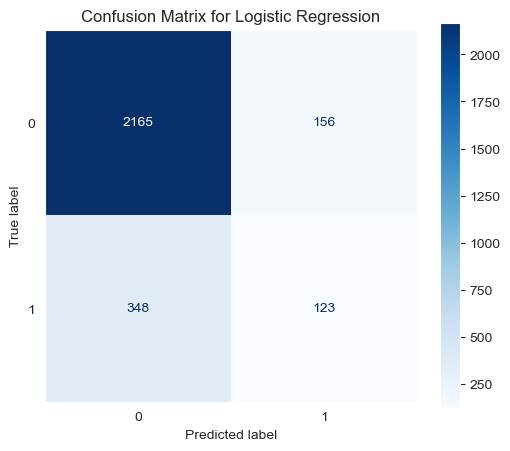

In [28]:
logisitc_regression_cm = confusion_matrix(y_test, 
                                          y_pred, 
                                          labels=logistic_regression.classes_)

display_of_cm = ConfusionMatrixDisplay(confusion_matrix=logisitc_regression_cm,
                                       display_labels=logistic_regression.classes_)

fig, ax = plt.subplots(figsize=(6, 5))
display_of_cm.plot(cmap='Blues', values_format='d', ax=ax)
ax.grid(False)

plt.title("Confusion Matrix for Logistic Regression")

plt.show()

- True negatives [upper-left]: The number of people who didn't leave and model predicted did not leave
- False positives [upper-right]: The number of people who didn't leave and model predicted as leaving
- False negatives [bottom-left]: The number of people who left and model predicted did not leave
- True positives [bottom-right]: The number of people who left and model predicted as leaving

In [29]:
df_for_logistical_regression['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [30]:
print(classification_report(y_test, y_pred, target_names=['Predicted would not leave', 'Predicted would leave']))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



We have low prediction rates for employees that would leave. This mean that model don't give a lot of significant information to us for preventing people leaving the company

# Tree-based ML Model

In [31]:
y = df_analyze['left']

X = df_analyze.drop('left', axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    stratify=y, 
                                                    random_state=42)

## Decision Tree

In [33]:
decision_tree = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[4, 6, 8, 12, 16, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 4, 6, 8]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

decision_tree_cv = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=3, refit='roc_auc')

In [34]:
%%time
decision_tree_cv.fit(X_train, y_train)

CPU times: user 3.75 s, sys: 48.4 ms, total: 3.8 s
Wall time: 3.81 s


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'roc_auc'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [35]:
decision_tree_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [36]:
decision_tree_cv.best_score_

np.float64(0.9704921442981854)

In [37]:
def make_results(model_name:str, model_object, metric:str):
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = round(best_estimator_results.mean_test_roc_auc, 5)
    f1 = round(best_estimator_results.mean_test_f1, 5)
    recall = round(best_estimator_results.mean_test_recall, 5)
    precision = round(best_estimator_results.mean_test_precision, 5)
    accuracy = round(best_estimator_results.mean_test_accuracy, 5)
  
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [38]:
results = make_results('Decision Tree CV', decision_tree_cv, 'auc')
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.92324,0.91561,0.91934,0.97331,0.97049


## XGBoost

In [39]:
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {
    'max_depth': [4, 6, 8, 12],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200]
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=3, refit='roc_auc')

In [40]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 41.9 s, sys: 3min 4s, total: 3min 46s
Wall time: 1min 4s


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [4, 6, ...], 'min_child_weight': [1, 3, ...], 'n_estimators': [100, 200]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'roc_auc'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [41]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 100}

In [42]:
xgb_cv.best_score_

np.float64(0.9869282199219412)

In [43]:
xgb_cv_res = make_results('XGBoost CV', xgb_cv, 'auc')
results = pd.concat([results, xgb_cv_res], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.92324,0.91561,0.91934,0.97331,0.97049
0,XGBoost CV,0.96487,0.91829,0.94098,0.98087,0.98693


## Random Forest

In [44]:
random_forest = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.5, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

random_forest_cv = GridSearchCV(random_forest, cv_params, scoring=scoring, cv=3, refit='roc_auc')

In [45]:
%%time
random_forest_cv.fit(X_train, y_train)

CPU times: user 6min 33s, sys: 3.86 s, total: 6min 37s
Wall time: 6min 38s


,estimator,RandomForestC...andom_state=0)
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': [1.0], 'max_samples': [0.5, 1.0], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'roc_auc'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [46]:
random_forest_cv.best_score_

np.float64(0.9813258867798491)

In [47]:
random_forest_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

Saving model to not wait again for training:

In [48]:
def save_model(path, model_object, save_as:str): 
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
    
def load_model(path, saved_model_name:str):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [49]:
path_for_models = '/Users/mirya/Downloads/temp_lab_for_show/models/'
save_model(path_for_models, xgb_cv, 'xgb_cv_scores')
save_model(path_for_models, random_forest_cv, 'random_forest_cv_scores')

<b> Scores <b>

In [50]:
random_forest_cv_res = make_results('Random Forest CV', random_forest_cv, 'auc')
results = pd.concat([results, random_forest_cv_res], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.92324,0.91561,0.91934,0.97331,0.97049
0,XGBoost CV,0.96487,0.91829,0.94098,0.98087,0.98693
0,Random Forest CV,0.95067,0.91561,0.93279,0.97809,0.98133


We can see that evaluation scores from XGBoost are better than from Decision Tree and Random Forest. Now we can evaluate XGBoost model on the test set (as a model with best scores)

In [51]:
def get_scores(model_name:str, model, X_test_data, y_test_data):

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds),5)
    accuracy = round(accuracy_score(y_test_data, preds),5)
    precision = round(precision_score(y_test_data, preds),5)
    recall = round(recall_score(y_test_data, preds),5)
    f1 = round(f1_score(y_test_data, preds),5)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

In [52]:
xgb_test_scores = get_scores('XGBoost Test', xgb_cv, X_test, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.92324,0.91561,0.91934,0.97331,0.97049
0,XGBoost CV,0.96487,0.91829,0.94098,0.98087,0.98693
0,Random Forest CV,0.95067,0.91561,0.93279,0.97809,0.98133
0,XGBoost Test,0.96855,0.92771,0.94769,0.98299,0.96086


Most of test scores are better compared to validation scores, only AUC is a little worse

# Feature Engineering 

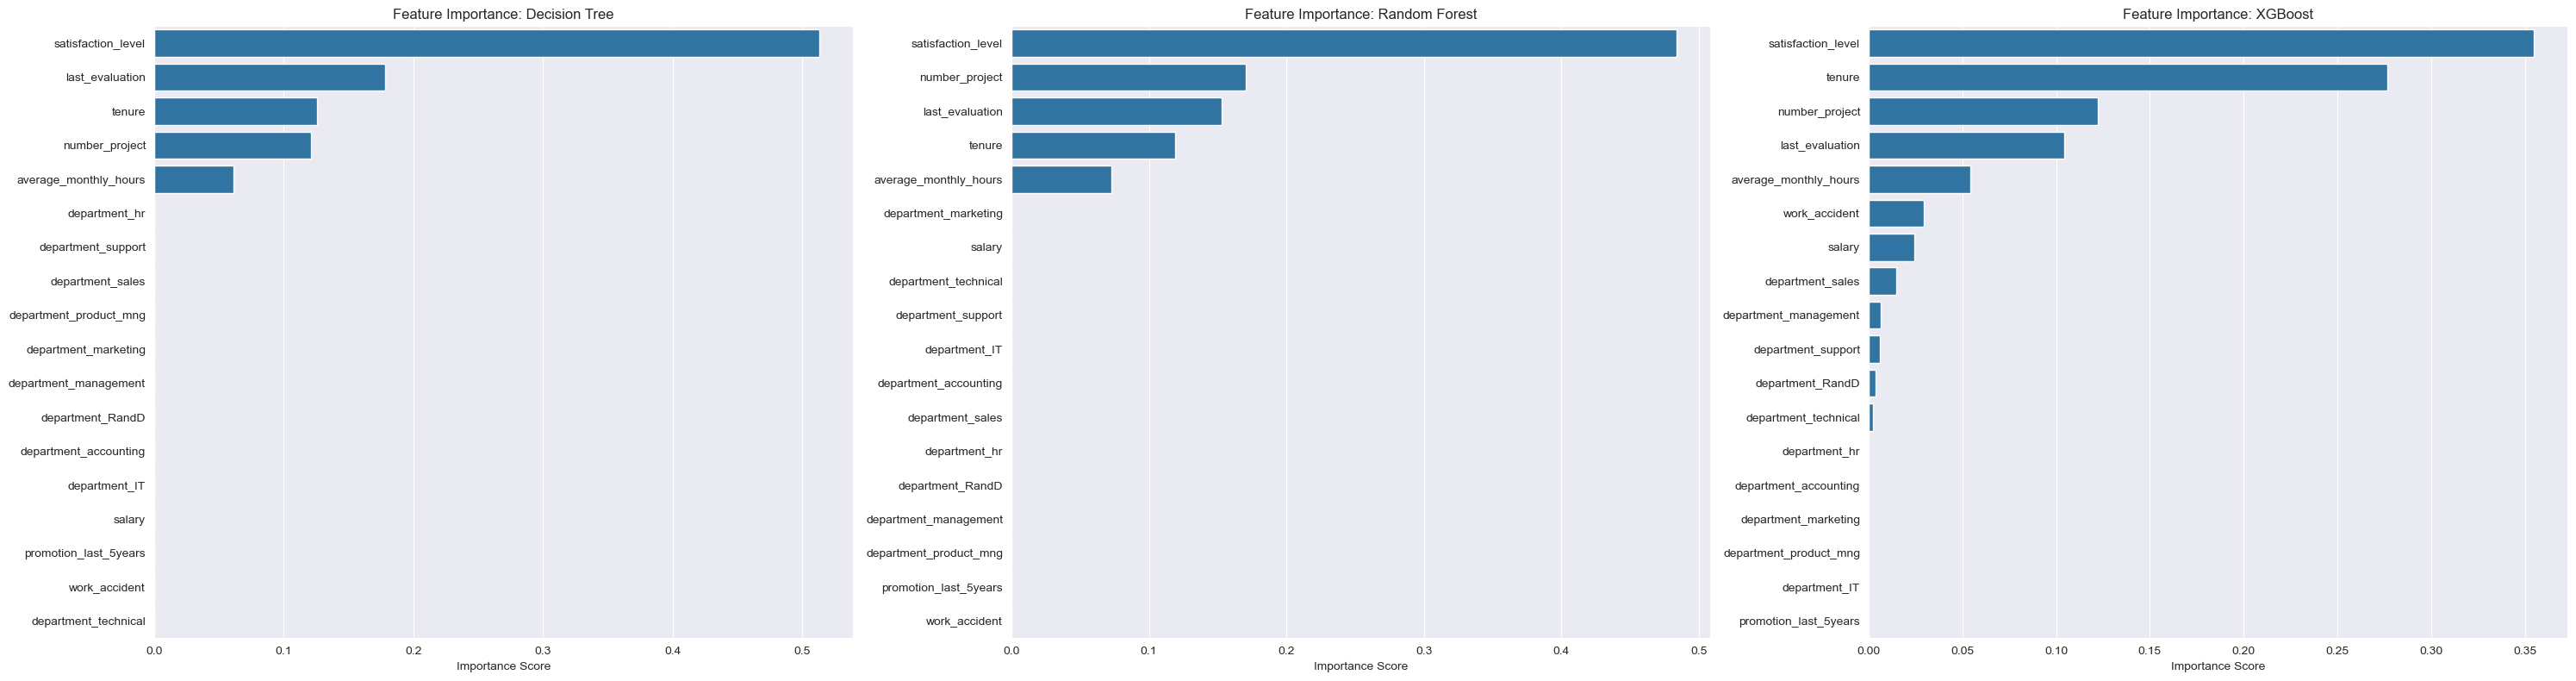

In [53]:
models = [(decision_tree_cv, "Decision Tree"), (random_forest_cv, "Random Forest"), (xgb_cv, "XGBoost")]

fig, ax = plt.subplots(1, 3, figsize=(30, 8))

for i, (model, name) in enumerate(models):
    feat_importance = model.best_estimator_.feature_importances_
    
    df_imp = pd.DataFrame({
        'Feature': X_test.columns, 
        'Importance': feat_importance
    }).sort_values('Importance', ascending=False)
    
    sns.barplot(x='Importance', y='Feature', data=df_imp, ax=ax[i])
    
    ax[i].set_title(f'Feature Importance: {name}')
    ax[i].set_xlabel('Importance Score')
    ax[i].set_ylabel('') 

plt.tight_layout()
plt.show()

From our plots from Analyze stage and Feature Importance plots for Decision Tree and Random Forest we can see that information about department don't give any sensfull information -> We can remowe it

In [54]:
df_feature_engineering = df1.drop('department', axis=1)

df_feature_engineering['salary'] = (
    df_feature_engineering['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

df_feature_engineering

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2
11996,0.74,0.95,5,266,10,0,0,1,2
11997,0.85,0.54,3,185,10,0,0,1,2
11998,0.33,0.65,3,172,10,0,0,1,2


We can add two new values:
- burnout_risk: if employee works more than 240 hours per month and has satisfaction_level lower than 0.5 we will write Truee
- intensity: average_monthly_hours / number_project
- stagnation: if employee works more then 4 years in company and didn't get promoted

In [55]:
df_feature_engineering['burnout_rist'] = np.where((df_feature_engineering['average_monthly_hours']>=240) & (df_feature_engineering['satisfaction_level']<0.50), 1, 0)
df_feature_engineering['intensity'] = round(df_feature_engineering['average_monthly_hours']/df_feature_engineering['number_project'], 2)
df_feature_engineering['stagnation'] = np.where((df_feature_engineering['tenure']>=4) & (df_feature_engineering['promotion_last_5years']==0), 1, 0)

df_feature_engineering

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,burnout_rist,intensity,stagnation
0,0.38,0.53,2,157,3,0,1,0,0,0,78.50,0
1,0.80,0.86,5,262,6,0,1,0,1,0,52.40,1
2,0.11,0.88,7,272,4,0,1,0,1,1,38.86,1
3,0.72,0.87,5,223,5,0,1,0,0,0,44.60,1
4,0.37,0.52,2,159,3,0,1,0,0,0,79.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,86.33,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,53.20,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,61.67,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,57.33,0


Now we can drop promotion_last_5years and average_monthly_hours columns

In [56]:
df_feature_engineering.drop(['promotion_last_5years', 'average_monthly_hours'], axis=1, inplace=True)

df_feature_engineering

,satisfaction_level,last_evaluation,number_project,tenure,work_accident,left,salary,burnout_rist,intensity,stagnation
0,0.38,0.53,2,3,0,1,0,0,78.50,0
1,0.80,0.86,5,6,0,1,1,0,52.40,1
2,0.11,0.88,7,4,0,1,1,1,38.86,1
3,0.72,0.87,5,5,0,1,0,0,44.60,1
4,0.37,0.52,2,3,0,1,0,0,79.50,0
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,10,1,0,2,0,86.33,0
11996,0.74,0.95,5,10,0,0,2,0,53.20,0
11997,0.85,0.54,3,10,0,0,2,0,61.67,0
11998,0.33,0.65,3,10,0,0,2,0,57.33,0


In [57]:
y = df_feature_engineering['left']

X = df_feature_engineering.drop('left', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    stratify=y, 
                                                    random_state=42)

## Decision Tree - After Feature Engineering

In [58]:
decision_tree_fe = DecisionTreeClassifier(random_state=42)

cv_params = {'max_depth':[4, 6, 8, 12, 16, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 4, 6, 8]
             }

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

decision_tree_fe_cv = GridSearchCV(decision_tree_fe, cv_params, scoring=scoring, cv=3, refit='roc_auc')

In [59]:
%%time
decision_tree_fe_cv.fit(X_train, y_train)

CPU times: user 3.63 s, sys: 40.8 ms, total: 3.67 s
Wall time: 3.68 s


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'roc_auc'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [60]:
decision_tree_fe_cv_res = make_results('Decision Tree FE CV', decision_tree_fe_cv, 'auc')
results = pd.concat([results, decision_tree_fe_cv_res], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.92324,0.91561,0.91934,0.97331,0.97049
0,XGBoost CV,0.96487,0.91829,0.94098,0.98087,0.98693
0,Random Forest CV,0.95067,0.91561,0.93279,0.97809,0.98133
0,XGBoost Test,0.96855,0.92771,0.94769,0.98299,0.96086
0,Decision Tree FE CV,0.95858,0.91427,0.93590,0.97921,0.97039


## XGBoost - After Feature Engineering

In [61]:
xgb_fe = XGBClassifier(objective='binary:logistic', random_state=42)

cv_params = {
    'max_depth': [4, 6, 8, 12],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200]
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

xgb_fe_cv = GridSearchCV(xgb_fe, cv_params, scoring=scoring, cv=3, refit='roc_auc')

In [62]:
%%time
xgb_fe_cv.fit(X_train, y_train)

CPU times: user 39.9 s, sys: 3min 6s, total: 3min 46s
Wall time: 1min 2s


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [4, 6, ...], 'min_child_weight': [1, 3, ...], 'n_estimators': [100, 200]}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'roc_auc'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [63]:
xgb_fe_cv_res = make_results('XGBoost FE CV', xgb_fe_cv, 'auc')
results = pd.concat([results, xgb_fe_cv_res], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.92324,0.91561,0.91934,0.97331,0.97049
0,XGBoost CV,0.96487,0.91829,0.94098,0.98087,0.98693
0,Random Forest CV,0.95067,0.91561,0.93279,0.97809,0.98133
0,XGBoost Test,0.96855,0.92771,0.94769,0.98299,0.96086
0,Decision Tree FE CV,0.95858,0.91427,0.93590,0.97921,0.97039
0,XGBoost FE CV,0.96887,0.91695,0.94218,0.98132,0.98496


## Random Forest - After Feature Engineering

In [64]:
random_forest_fe = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3, 5, None], 
             'max_features': [1.0],
             'max_samples': [0.5, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }  

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

random_forest_fe_cv = GridSearchCV(random_forest_fe, cv_params, scoring=scoring, cv=3, refit='roc_auc')

In [65]:
%%time
random_forest_fe_cv.fit(X_train, y_train)

CPU times: user 6min 1s, sys: 4.74 s, total: 6min 6s
Wall time: 6min 6s


,estimator,RandomForestC...andom_state=0)
,param_grid,"{'max_depth': [3, 5, ...], 'max_features': [1.0], 'max_samples': [0.5, 1.0], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,None
,refit,'roc_auc'
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [66]:
random_forest_fe_cv_res = make_results('Random Forest FE CV', random_forest_fe_cv, 'auc')
results = pd.concat([results, random_forest_fe_cv_res], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.92324,0.91561,0.91934,0.97331,0.97049
0,XGBoost CV,0.96487,0.91829,0.94098,0.98087,0.98693
0,Random Forest CV,0.95067,0.91561,0.93279,0.97809,0.98133
0,XGBoost Test,0.96855,0.92771,0.94769,0.98299,0.96086
0,Decision Tree FE CV,0.95858,0.91427,0.93590,0.97921,0.97039
0,XGBoost FE CV,0.96887,0.91695,0.94218,0.98132,0.98496
0,Random Forest FE CV,0.94166,0.90824,0.92464,0.97543,0.98062


In [67]:
save_model(path_for_models, xgb_fe_cv, 'xgb_fe_cv_scores')
save_model(path_for_models, random_forest_fe_cv, 'random_forest_fe_cv_scores')

We can see that in this case XGBoost model also have better scores than Random Forest and  Decision Tree

In [68]:
xgb_fe_cv_test_scores = get_scores('XGBoost FE Test', xgb_fe_cv, X_test, y_test)
results = pd.concat([results, xgb_fe_cv_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,Decision Tree CV,0.92324,0.91561,0.91934,0.97331,0.97049
0,XGBoost CV,0.96487,0.91829,0.94098,0.98087,0.98693
0,Random Forest CV,0.95067,0.91561,0.93279,0.97809,0.98133
0,XGBoost Test,0.96855,0.92771,0.94769,0.98299,0.96086
0,Decision Tree FE CV,0.95858,0.91427,0.93590,0.97921,0.97039
0,XGBoost FE CV,0.96887,0.91695,0.94218,0.98132,0.98496
0,Random Forest FE CV,0.94166,0.90824,0.92464,0.97543,0.98062
0,XGBoost FE Test,0.95833,0.92369,0.94070,0.98065,0.95785


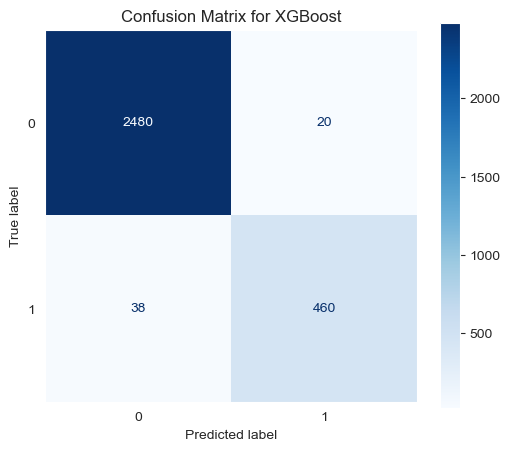

In [69]:
cm_data = xgb_fe_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, cm_data, labels=decision_tree_fe_cv.classes_)

cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=decision_tree_fe_cv.classes_)

fig, ax = plt.subplots(figsize=(6, 5))
cm_plot.plot(cmap='Blues', values_format='d', ax=ax)
ax.grid(False)

plt.title("Confusion Matrix for XGBoost")

plt.show()

# Feature Importance

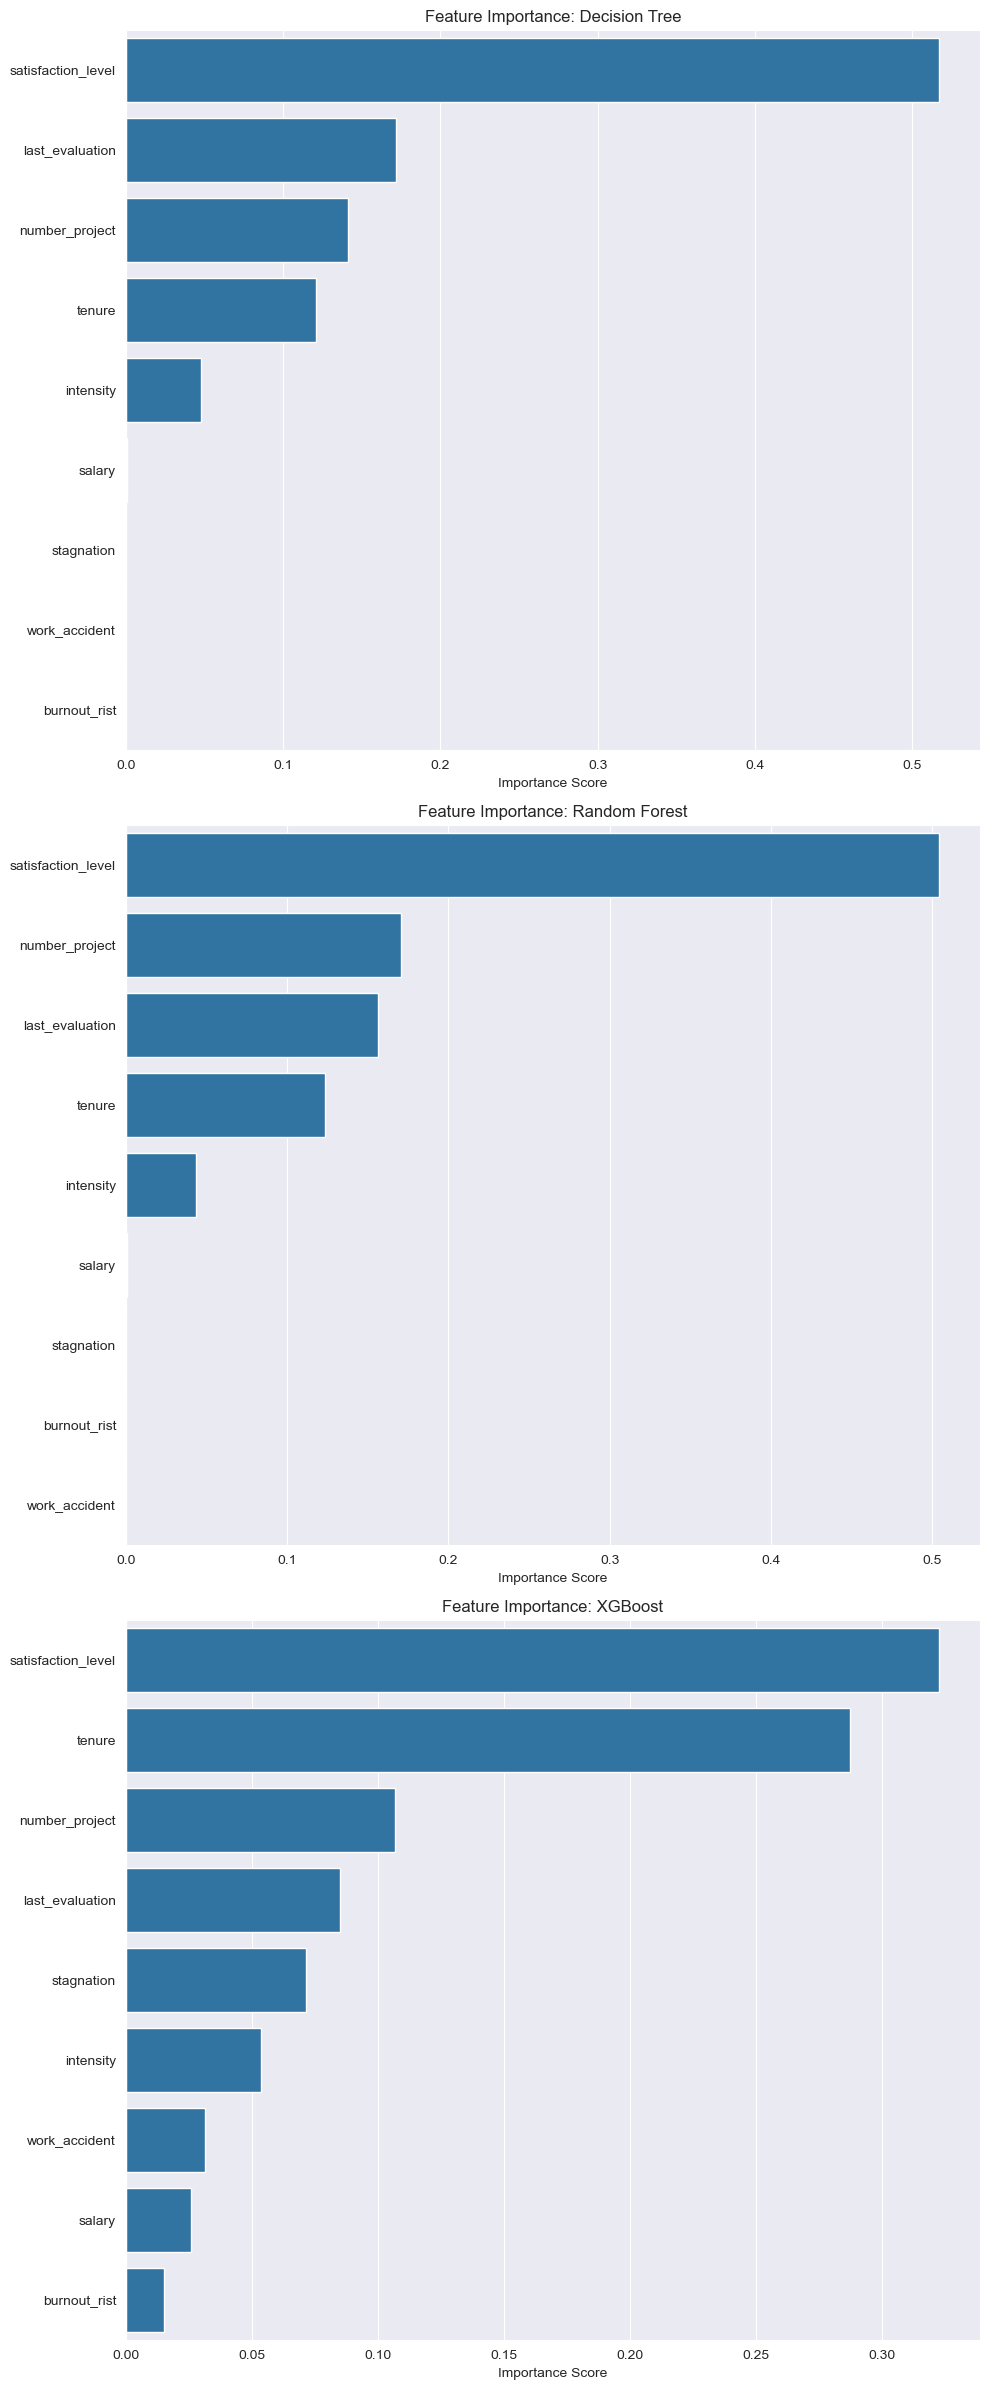

In [75]:
models = [(decision_tree_fe_cv, "Decision Tree"), (random_forest_fe_cv, "Random Forest"), (xgb_fe_cv, "XGBoost")]

fig, ax = plt.subplots(3, 1, figsize=(10, 24))

for i, (model, name) in enumerate(models):
    feat_importance = model.best_estimator_.feature_importances_

    df_imp = pd.DataFrame({
        'Feature': X_test.columns,
        'Importance': feat_importance
    }).sort_values('Importance', ascending=False)

    sns.barplot(x='Importance', y='Feature', data=df_imp, ax=ax[i])

    ax[i].set_title(f'Feature Importance: {name}')
    ax[i].set_xlabel('Importance Score')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved (all weighted averages):
- precision: 79%
- recall: 82%
- accuracy of 83%
- F1-score: 80%

**Tree-based Machine Learning**

After feature engineering (scores on validation set):
- Decision Tree on Validation Set:
    - precision: 95.85%
    - recall: 91.47%
    - accuracy: 97.92%
    - F1-score: 93.59%
    - AUC: 97.03%
- Random Forest on Validation Set:
    - precision: 94.16%
    - recall: 90.82%
    - accuracy: 97.54%
    - F1-score: 92.44%
    - AUC: 98.06%
- XGBoost on Validation Set:
    - precision: 96.88%
    - recall: 91.69%
    - accuracy: 98.13%
    - F1-score: 94.21%
    - AUC: 98.49%
- XGBoost on Test Set:
    - precision: 95.83%
    - recall: 92.36%
    - accuracy: 98.06%
    - F1-score: 94.07%
    - AUC: 95.78%

XGBoost outperformed Decision Tree and Random Forest models

### Conclusion, Recommendations, Next Steps

The analysis confirms that employee overworking is the primary driver of churn. To improve retention, we recommend:
- Limit Workload: Cap the maximum number of active projects per employee.
- Address Stagnation: Review promotion paths for employees with 4+ years of tenure to address specific dissatisfaction.
- Regulate Overtime: Either explicitly compensate for overtime or strictly enforce standard hours. Ensure policies are transparent.
- Revise Evaluations: Detach high performance scores from excessive working hours (240+/month); reward efficiency over duration.
- Improve Culture: Initiate open discussions to address work culture and expectations at both team and company levels.